# 서울시 구별 CCTV 현황 분석

- '01_CCTV_in_Seoul.csv'
- '01_population_in_Seoul.xls'

# 파일 읽어오기
    - pandas.read_csv()
    - pandas.read_excel()

## 서울시 구별 CCTV 현황 데이터 읽기

In [2]:
import pandas as pd

In [3]:
cctv_seoul = pd.read_csv('01_CCTV_in_Seoul.csv', encoding = 'utf-8')  # encoding 주의
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [4]:
# 데이터의 모든 컬럼명 조회
cctv_seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [5]:
# '기관명' -> '구별'로 컬럼 이름 변경 
# .rename(colums = {.columns[0]:'dd', .columns[1]:'ddss', .columns[3]:'dddd',..})
# inplace = True 변경 값 데이터프레임에 적용
cctv_seoul.rename(columns = {cctv_seoul.columns[0]:'구별'}, inplace = True)
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


## 서울시 구별 인구 현황 데이터 읽기

In [6]:
pop_seoul = pd.read_excel('01_population_in_Seoul.xls', encoding = 'utf-8')  # encoding 까먹지 말기!
pop_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


- 읽어오긴 했는데 헤더가 3줄씩이나 있음   ->  수정 필요!!

In [7]:
# heaher 읽는 위치 조정: header = 2 : 세번째 줄부터 읽어라
# 엑셀 상의 B,D,G,J,N 열만 읽어오기: parse_cols  (X)  ->  usecols로 변경됨.
pop_seoul = pd.read_excel('01_population_in_Seoul.xls', header = 2, usecols = 'B,D,G,J,N', encoding = 'utf-8')
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [8]:
# 컬럼 이름 변경

pop_seoul.rename(columns = {pop_seoul.columns[0]:'구별',
                            pop_seoul.columns[1]:'인구수',
                            pop_seoul.columns[2]:'한국인',
                            pop_seoul.columns[3]:'외국인',
                            pop_seoul.columns[4]:'고령자'},
                            inplace = True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


# 각 데이터 확인

- cctv_seoul data로 cctv가 가장 많이/적게 설치된 곳 알아보기 (`.sort_valuse`)

In [9]:
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [10]:
# cctv가 가장 적게 설치된 곳 알아보기
# 소계 column 기준으로 오름차순정렬
cctv_seoul.sort_values(by='소계', ascending = True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [11]:
# cctv가 가장 많이 설치된 곳 알아보기
# 소계 column 기준으로 내림차순 정렬
cctv_seoul.sort_values(by='소계', ascending = False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


- 최근 3년간 cctv 증가율

In [12]:
# 최근 3년간 증가율 = (2014+15+16) / 2013년 이전 *100 
cctv_seoul['최근증가율'] = (cctv_seoul['2014년'] + cctv_seoul['2015년'] +
                       cctv_seoul['2016년']) / cctv_seoul['2013년도 이전']*100
cctv_seoul.sort_values(by='최근증가율', ascending = False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


- 인구 현황 정리

In [13]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [14]:
# 필요없는 '합계'행 지우기 - .drop
pop_seoul.drop([0], inplace = True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [15]:
# 중복 데이터 검사 - .unique()
pop_seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [16]:
# 위의 결과로 나온 NaN 행 확인 - null값확인: .isnull()
pop_seoul[pop_seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [17]:
# NaN/null 행 지우기
pop_seoul.drop([26], inplace = True)
pop_seoul[pop_seoul['구별'].isnull()]  # NaN/null있나 다시 확인

,구별,인구수,한국인,외국인,고령자


In [18]:
# 전체 인구로, 구별 '외국인비율', '고령자비율' 계산
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수'] *100
pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구수'] *100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [19]:
# 인구수 기준으로 내림차순 정렬
pop_seoul.sort_values(by='인구수', ascending = False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [20]:
# 외국인수 기준 내림차순 정렬
pop_seoul.sort_values(by='외국인', ascending = False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [21]:
# 외국인비율 기준 내림차순 정렬
pop_seoul.sort_values(by='외국인비율', ascending = False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


-> 외국인'수'와 총인구대비 외국인'비율'은 엄연히 다른 척도. => 순위 다름. 

In [22]:
# 고령자수 기준 내림차순 정렬
pop_seoul.sort_values(by='고령자', ascending = False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [23]:
# 고령자비율 기준 내림차순정렬
pop_seoul.sort_values(by='고령자비율', ascending = False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


# 두 데이터 병합: cctv data, 인구현황 data 합치기

In [24]:
# 공통 컬럼인 '구별'로 merge
data_result = pd.merge(cctv_seoul, pop_seoul, on = '구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


- 행삭제: drop
- 열삭제: del

In [25]:
# 의미 없는 컬럼 삭제
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


- .set_index()

In [26]:
# 분석 편의성을 위해 - index를 번호가아닌, 구 이름('구별')으로 변경
data_result.set_index('구별',inplace = True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


## 상관계수  -  corrcoef()
- 상관계수의 절대값이 클수록, 두 데이터 관계가 있다고 볼 수 있음
- 양(+),음(-)의 상관관계  (-1 <= r <= 1)
    - |r| <= 0.1 : 거의 관계가 없음
    - 0.1 <= |r| <= 0.3 : 약한 상관관계
    - 0.3 <= |r| <=0.7 : 강한 상관관계
    - 0.7 <= |r| <= 1 : 매우 강한 상관관계

- numpy의 `corrcoef()` 이용
    - 결과를 대칭 행렬로 나타냄

In [29]:
import numpy as np

### cctv개수와 (고령자비율, 외국인비율, 인구수)간의 상관관계 알아보기

In [34]:
# cctv개수와 고령자비율 - 약한 음의 상관관계
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [35]:
# cctv개수와 외국인비율 - 큰 의미 없음
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [36]:
# cctv개수와 인구수 - 약한 양의 상관관계
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

### cctv 개수와 인구수 간의 관계 조금더 살피기

In [37]:
# cctv 개수순으로 내림차순정렬
data_result.sort_values(by='소계', ascending = False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [38]:
# 인구순으로 내림차순정렬
data_result.sort_values(by='인구수', ascending = False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


# cctv현황 그래프로 분석하기
- Matplotlib: python 시각화 도구

In [40]:
import matplotlib.pyplot as plt

In [48]:
# matplotlib 기본 폰트는 한글 폰트 지원 X, matplotlib의 폰트 변경해야함.
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name)

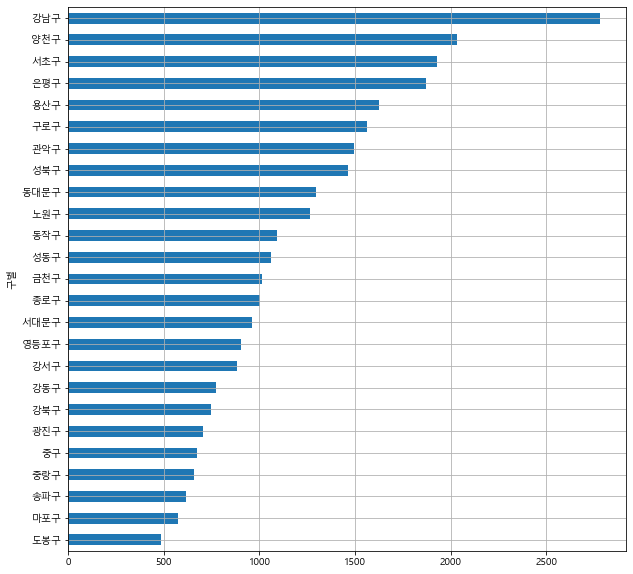

In [54]:
# pandas data뒤에 .plot 붙이면 그래프 그려줌!
# kind = 그래프종류, grid = 격자무늬, figsize = 출력 사이즈
# 그냥 출력하면 순서 뒤죽박죽이라 보기 어려우니, 내림차순 정렬해서 출력: .sort_values()
data_result['소계'].sort_values().plot(kind = 'barh', grid = True, figsize = (10,10))
plt.show()

- cctv 개수 강남구가 월등함. 그 다음 양천구, 서초구, 은평구순으로 많음.
- 도봉구 cctv 개수가 가장 적음

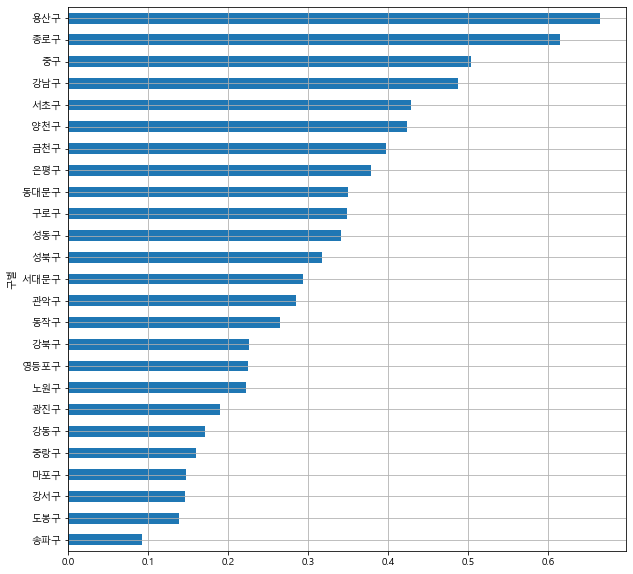

In [53]:
# 인구대비 cctv 비율 생성/계산
data_result['cctv비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['cctv비율'].sort_values().plot(kind = 'barh', grid = True, figsize = (10,10))
plt.show()

- 인구대비 cctv수는 용산구가 가장많고, 다음으로 용산구, 종로구, 중구순으로 많음
- 송파구, 도봉구는 인구대비로 봐도 cctv 설치수 비율이 낮음

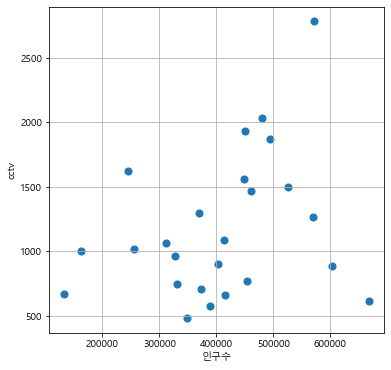

In [56]:
# scatter 함수 사용해서, 산점도 그래프 그리기
plt.figure(figsize = (6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s = 50) #s = 50 : marker 크기 설정
plt.xlabel('인구수')
plt.ylabel('cctv')
plt.grid()
plt.show()

In [57]:
# data를 대표하는 직선 그리기  (cctv수와 인구수는 약한 양의 상관관계가 있었음)
fp1 = np.polyfit(data_result['인구수'], data_result['소계'],1)
fp1

array([1.30916415e-03, 6.45066497e+02])